In [1]:
from xml.dom import minidom
import pandas as pd
pd.options.display.max_columns=100
pd.options.display.max_rows=1000
import xmltodict
import json
import glob
import os
from tqdm import tqdm
import geopandas as gpd
tqdm.pandas()
import shapely
from shapely import geometry
from shapely import wkt
import re

C:\Users\Mikhail\anaconda3\envs\heros\lib\site-packages\tqdm\std.py:701: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
path = '../../data/'

In [2]:
xml_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".xml"):
            xml_files.append(os.path.join(root, file))
files = xml_files

NameError: name 'path' is not defined

In [32]:
res = []
for file in tqdm(files, total=len(files)):
    with open(file) as xml_file:
        data_dict = xmltodict.parse(xml_file.read())
    
    json_data = json.dumps(data_dict)
    res.append(json.loads(json_data))

100%|████████████████████████████████████████████████████████████████████████████████| 143/143 [04:46<00:00,  2.00s/it]


In [5]:
issues = []
a=res[0]['sl-bag-extract:bagStand']['sl:standBestand']['sl:stand'][0]['sl-bag-extract:bagObject']['Objecten:Pand']
res_keys = {k:[] for k in a.keys()}
k=0
for data in res:
    for num in range(len(data['sl-bag-extract:bagStand'].get('sl:standBestand')["sl:stand"])):
        k+=1
        a=data['sl-bag-extract:bagStand']['sl:standBestand']['sl:stand'][num]['sl-bag-extract:bagObject']['Objecten:Pand']
        for index, key in enumerate(a.keys()):
            try:
                res_keys[key].append(a[key])
            except:
                issues.append(k)
#                 print(k, a[key])
                continue

In [6]:
df = pd.DataFrame(columns = list(res_keys.keys()))
for index, key in enumerate(res_keys.keys()):
    df[key] = res_keys[key]

In [7]:
# keynames = list(df['Objecten:heeftAlsHoofdadres'][100].get('Objecten-ref:NummeraanduidingRef').keys())
_keys = {k:[] for k in df['Objecten:identificatie'][100].keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:identificatie'][i].get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 220242/220242 [00:02<00:00, 98248.65it/s]


In [8]:
new_keys = [f"identificatie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [9]:
identificatie = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    identificatie[key] = _keys[key]
    
df = pd.concat([df, identificatie],axis=1)

In [10]:
# keynames = list(df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys())
_keys = {k:[] for k in df['Objecten:geometrie'][0].get('gml:Polygon').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:geometrie'][i].get('gml:Polygon').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 220242/220242 [00:03<00:00, 67973.63it/s]


In [11]:
new_keys = [f"geometrie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [12]:
geometries = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    geometries[key] = _keys[key]
    
df = pd.concat([df, geometries],axis=1)

In [13]:
# keynames = list(df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys())
_keys = {k:[] for k in df['Objecten:geometrie'][0].get('gml:Polygon').get('gml:exterior').get('gml:LinearRing').get('gml:posList').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:geometrie'][i].get('gml:Polygon').get('gml:exterior').get('gml:LinearRing').get('gml:posList').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 220242/220242 [00:02<00:00, 92241.45it/s]


In [14]:
new_keys = [f"geometrie-{k}" for k in _keys.keys()]
for key,n_key in zip(_keys.keys(), new_keys):
    _keys[n_key] = _keys.pop(key)

In [15]:
geometries = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    geometries[key] = _keys[key]
    
df = pd.concat([df, geometries],axis=1)

In [16]:
# keynames = list(df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys())
_keys = {k:[] for k in df['Objecten:voorkomen'][0].get('Historie:Voorkomen').keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:voorkomen'][i].get('Historie:Voorkomen').get(key))
        except:
            _keys[key].append(None)

100%|███████████████████████████████████████████████████████████████████████| 220242/220242 [00:04<00:00, 51076.96it/s]


In [17]:
voorkomen = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    voorkomen[key] = _keys[key]
    
df = pd.concat([df, voorkomen],axis=1)

In [18]:
# keynames = list(df['Objecten:geometrie'][100].get('Objecten:punt').get("gml:Point").keys())
_keys = {k:[] for k in df['Objecten:voorkomen'][0].get('Historie:Voorkomen').get("Historie:BeschikbaarLV").keys()}
for i in tqdm(range(len(df)), total=len(df)):
    for index, key in enumerate(_keys.keys()):
        try:
            _keys[key].append(df['Objecten:voorkomen'][i].get('Historie:Voorkomen').get('Historie:BeschikbaarLV').get(key))
        except:
            _keys[key].append(None)

100%|██████████████████████████████████████████████████████████████████████| 220242/220242 [00:01<00:00, 170418.45it/s]


In [19]:
voorkomen = pd.DataFrame(columns = _keys.keys())
for index, key in enumerate(_keys.keys()):
    voorkomen[key] = _keys[key]
    
df = pd.concat([df, voorkomen],axis=1)

In [21]:
df.to_csv("PND.csv", index=False)

In [80]:
df_clear = df.copy()

In [81]:
del df["Objecten:geometrie"]
df.to_parquet('PND.parquet')

## Loading from parquet and converting to gdf.

In [194]:
df = pd.read_parquet("PND.parquet")

In [195]:
def to_polygon(row):
    pointList = [f"POINT({x})" for x in re.split(r'(.*?\s.*?\s.*?)\s', row) if x]
    pointList = [wkt.loads(i) for i in pointList]
    return geometry.Polygon([[p.x, p.y] for p in pointList])

In [200]:
df['geometry'] = df["geometrie-#text"].progress_apply(lambda x: to_polygon(x))

100%|████████████████████████████████████████████████████████████████████████| 220242/220242 [01:22<00:00, 2665.73it/s]


In [197]:
df = gpd.GeoDataFrame(df, geometry='geometry')

<AxesSubplot:>

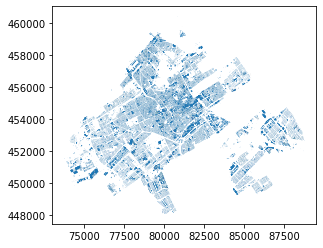

In [198]:
df.plot()